<a href="https://colab.research.google.com/github/GodinaMohitheswar/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

-------------

## **Objective**

To create a movie recommendation system that provides movie suggestions based on different criteria such as movie name, genre, year, director, and top-rated movies.

## **Data Source**

The data is sourced from a CSV file movies.csv, which contains information about various movies.

## **Import Library**

In [36]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [37]:
movies_data = pd.read_csv('/content/movies.csv')

## **Describe Data**

In [38]:
print(movies_data[['title', 'director', 'genres', 'release_date', 'vote_average']].head(10))

                                      title           director  \
0                                    Avatar      James Cameron   
1  Pirates of the Caribbean: At World's End     Gore Verbinski   
2                                   Spectre         Sam Mendes   
3                     The Dark Knight Rises  Christopher Nolan   
4                               John Carter     Andrew Stanton   
5                              Spider-Man 3          Sam Raimi   
6                                   Tangled       Byron Howard   
7                   Avengers: Age of Ultron        Joss Whedon   
8    Harry Potter and the Half-Blood Prince        David Yates   
9        Batman v Superman: Dawn of Justice        Zack Snyder   

                                     genres release_date  vote_average  
0  Action Adventure Fantasy Science Fiction   2009-12-10           7.2  
1                  Adventure Fantasy Action   2007-05-19           6.9  
2                    Action Adventure Crime   2015-10-

In [39]:
print(movies_data.shape)

(4803, 24)


## **Data Visualization**

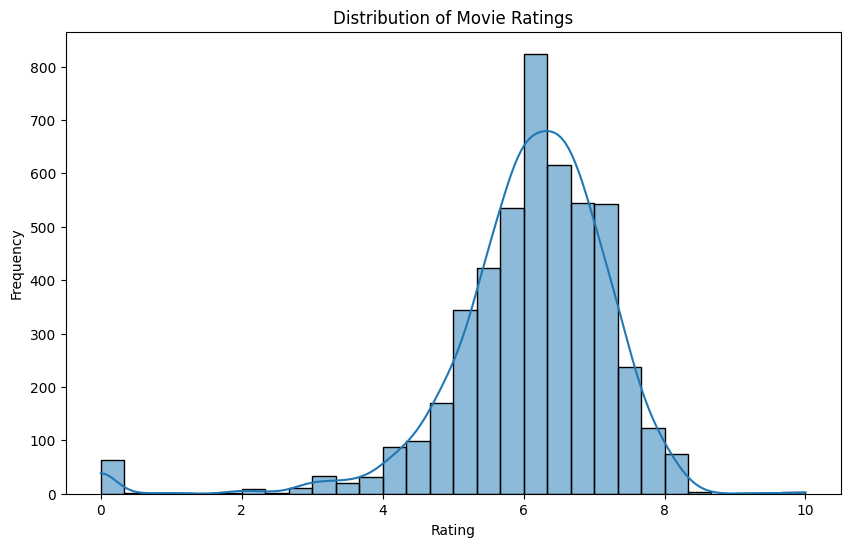

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['vote_average'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## **Data Preprocessing**

In [41]:
def combine_features(data):
    selected_features = ['genres', 'keywords', 'tagline', 'cast', 'director']
    for feature in selected_features:
        data[feature] = data[feature].fillna('')
    combined_features = data['genres'] + ' ' + data['keywords'] + ' ' + data['tagline'] + ' ' + data['cast'] + ' ' + data['director']
    return combined_features

In [42]:
combined_features = combine_features(movies_data)
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
similarity = cosine_similarity(feature_vectors)

## **Modeling**

In [43]:
def get_top_rated_movies(data, top_n=20):
    top_rated_movies = data.sort_values(by='vote_average', ascending=False)
    top_rated_movies = top_rated_movies.head(top_n)
    return top_rated_movies[['title', 'vote_average']]

In [44]:
def get_recommendations(movie_name, data, similarity):
    list_of_all_titles = data['title'].tolist()
    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
    if not find_close_match:
        return "No close matches found for the movie name provided."
    close_match = find_close_match[0]
    index_of_the_movie = data[data.title == close_match]['index'].values[0]
    similarity_score = list(enumerate(similarity[index_of_the_movie]))
    sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    recommended_movies = []
    for i in range(1, 21):
        index = sorted_similar_movies[i][0]
        title_from_index = data[data.index == index]['title'].values[0]
        vote_average = data[data.index == index]['vote_average'].values[0]
        recommended_movies.append((title_from_index, vote_average))
    return recommended_movies

In [45]:
def get_recommendations_by_genre(genre, data, top_n=20):
    filtered_data = data[data['genres'].str.contains(genre, case=False, na=False)]
    sorted_filtered_data = filtered_data.sort_values(by='vote_average', ascending=False)
    return sorted_filtered_data[['title', 'vote_average']].head(top_n).values.tolist()

In [46]:
def get_recommendations_by_year(year, data, top_n=20):
    filtered_data = data[data['release_date'].str.contains(str(year), na=False)]
    sorted_filtered_data = filtered_data.sort_values(by='vote_average', ascending=False)
    return sorted_filtered_data[['title', 'vote_average']].head(top_n).values.tolist()

In [47]:
def get_recommendations_by_director(director, data, top_n=20):
    filtered_data = data[data['director'].str.contains(director, case=False, na=False)]
    sorted_filtered_data = filtered_data.sort_values(by='vote_average', ascending=False)
    return sorted_filtered_data[['title', 'vote_average']].head(top_n).values.tolist()

## **Prediction**

In [48]:
def print_movies_with_ratings(movies):
    for i, (title, rating) in enumerate(movies, 1):
        stars = '★' * int(rating) + '☆' * (10 - int(rating))
        print(f"{i}. {title:<35} {stars} ({rating}/10)")

In [49]:
def get_unique_genres_and_directors(data):
    unique_genres = set()
    for genres in data['genres']:
        if pd.notna(genres):
            unique_genres.update(genres.split(', '))
    unique_directors = data['director'].dropna().unique().tolist()
    return sorted(unique_genres), sorted(unique_directors)

In [50]:
unique_genres, unique_directors = get_unique_genres_and_directors(movies_data)

## **Menu-Driven Interface**

In [51]:
def menu():
    while True:
        print("\nMenu:")
        print("1. Get movie recommendations by movie name")
        print("2. Get movie recommendations by genre")
        print("3. Get movie recommendations by year")
        print("4. Get movie recommendations by director")
        print("5. Get top 20 highest rated movies")
        print("6. Exit")
        choice = input("\nEnter your choice: ")
        print()

        if choice == '1':
            movie_name = input("Enter your favorite movie name: ")
            print()
            recommendations = get_recommendations(movie_name, movies_data, similarity)
            if isinstance(recommendations, str):
                print(recommendations)
            else:
                print("\nMovies suggested for you:\n")
                print_movies_with_ratings(recommendations)

        elif choice == '2':
            print("\nAvailable Genres:")
            for genre in unique_genres:
                print(genre, end=', ')
            print('\n')
            genre = input("Enter the Genre: ")
            print()
            recommendations = get_recommendations_by_genre(genre, movies_data)
            print("\nMovies suggested for you:\n")
            print_movies_with_ratings(recommendations)

        elif choice == '3':
            year = input("Enter the Year (1916-2017): ")
            print()
            recommendations = get_recommendations_by_year(year, movies_data)
            print("\nMovies suggested for you:\n")
            print_movies_with_ratings(recommendations)

        elif choice == '4':
            print("\nAvailable Directors:")
            for director in unique_directors:
                print(director, end=', ')
            print('\n')
            director = input("Enter the Director's name: ")
            print()
            recommendations = get_recommendations_by_director(director, movies_data)
            print("\nMovies suggested for you:\n")
            print_movies_with_ratings(recommendations)

        elif choice == '5':
            top_20_movies = get_top_rated_movies(movies_data).values.tolist()
            print("\nTop 20 highest rated movies:\n")
            print_movies_with_ratings(top_20_movies)

        elif choice == '6':
            print("Exiting the system. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

In [52]:
menu()


Menu:
1. Get movie recommendations by movie name
2. Get movie recommendations by genre
3. Get movie recommendations by year
4. Get movie recommendations by director
5. Get top 20 highest rated movies
6. Exit

Enter your choice: 1

Enter your favorite movie name: Avengers


Movies suggested for you:

1. Avengers: Age of Ultron             ★★★★★★★☆☆☆ (7.3/10)
2. Captain America: The Winter Soldier ★★★★★★★☆☆☆ (7.6/10)
3. Captain America: Civil War          ★★★★★★★☆☆☆ (7.1/10)
4. Iron Man 2                          ★★★★★★☆☆☆☆ (6.6/10)
5. Thor: The Dark World                ★★★★★★☆☆☆☆ (6.8/10)
6. X-Men                               ★★★★★★☆☆☆☆ (6.8/10)
7. The Incredible Hulk                 ★★★★★★☆☆☆☆ (6.1/10)
8. X-Men: Apocalypse                   ★★★★★★☆☆☆☆ (6.4/10)
9. Ant-Man                             ★★★★★★★☆☆☆ (7.0/10)
10. Thor                                ★★★★★★☆☆☆☆ (6.6/10)
11. X2                                  ★★★★★★☆☆☆☆ (6.8/10)
12. X-Men: The Last Stand               ★★★★★★☆